# Transform Data

This notebook is used to transform the images the contain the target masks. 
With this notebook one can transform the 3 channel RGB masks to a 1 channel image with integer values from 0 to 12 representing the 13 different classes the pixels are labeled as. Those new images are stores in data/Labels_int.

In [2]:
import os

import cv2
import numpy as np
from fastai.data.transforms import get_image_files
from fastai.vision.core import PILImage, PILMask
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from fastai.torch_core import tensor

#### Define some paths for later use.

In [3]:
repo_path = os.path.dirname(os.path.abspath(''))
data_path = os.path.join(repo_path, 'data')
path_im = os.path.join(data_path, 'Images')

#### Get the path including the filename of alls images

In [4]:
fnames = get_image_files(path_im)

#### Define a lambda function to get the path to a mask for a given image

In [5]:
get_msk = lambda o: str(o.absolute()).replace('Images', 'Labels')

#### Define a list containing an array containing the names of the different classes and the color values of the different classes in the masks 

In [6]:
VOC_CLASSES = np.array([
    'Traffic Sign', 'Building', 'Fence', 'Other', 'Pedestrian', 'Pole', 'Road Line',
    'Road', 'Sidewalk', 'Vegetation', 'Car', 'Wall', 'Unlabeled'
])

VOC_COLORMAP = [
    [0, 220, 220], [70, 70, 70], [153, 153, 190], [160, 170, 250],
    [60, 20, 220], [153, 153, 153], [50, 234, 157], [128, 64, 128],
    [232, 35, 244], [35, 142, 107], [142, 0, 0], [156, 102, 102], [0, 0, 0]
]

#### Define a function that converts a given 3 channel image to a 1 channel image with int values corresponding to their respective class

In [7]:
def convert_mask_to_int(path):
    img = cv2.imread(path)
    new_img = np.zeros([img.shape[0], img.shape[1], 1])
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_img[row, column, 0] = VOC_COLORMAP.index(img[row, column, :].tolist())
    new_path = str(path).replace('Labels', 'Labels_int')
    cv2.imwrite(new_path, new_img)

#### Execute the function above for all images

In [ ]:
from tqdm import tqdm
    
with tqdm(total=len(fnames)) as pbar:
    for filename in fnames:
        pbar.update(1)
        convert_mask_to_int(get_msk(filename))

## Visualize the Data


/home/ujrgt/lama/itw_lama_group8/data/Images/Video_012/v012_0052.png


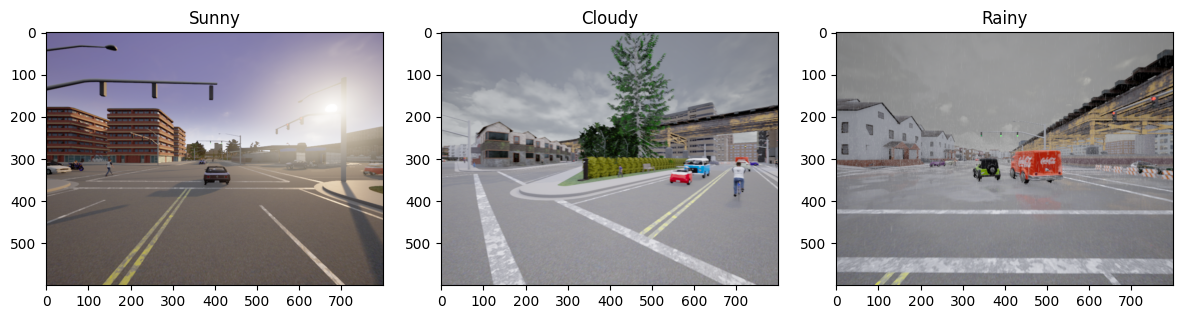

In [9]:
img_path_1 = os.path.join(path_im, 'Video_012/v012_0052.png')
img_1 = PILImage.create((img_path_1))
img_path_2 = os.path.join(path_im, 'Video_015/v015_0265.png')
img_2 = PILImage.create(img_path_2)
img_path_3 = os.path.join(path_im, 'Video_026/v026_0289.png')
img_3 = PILImage.create(img_path_3)

fig, ax = plt.subplots(1, 3, figsize=(12,6))
plt.tight_layout() 
ax[0].imshow(img_1)
ax[0].set_title('Sunny')
ax[1].imshow(img_2)
ax[1].set_title('Cloudy')
ax[2].imshow(img_3)
ax[2].set_title('Rainy')
plt.show()


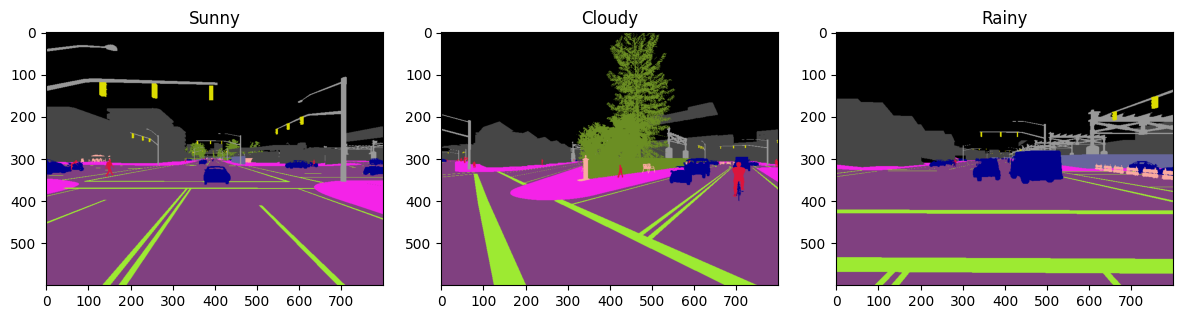

In [10]:
img_1 = PILImage.create(img_path_1.replace('Images', 'Labels'))
img_2 = PILImage.create(img_path_2.replace('Images', 'Labels'))
img_3 = PILImage.create(img_path_3.replace('Images', 'Labels'))

fig, ax = plt.subplots(1, 3, figsize=(12,6))
plt.tight_layout() 
ax[0].imshow(img_1)
ax[0].set_title('Sunny')
ax[1].imshow(img_2)
ax[1].set_title('Cloudy')
ax[2].imshow(img_3)
ax[2].set_title('Rainy')
plt.show()

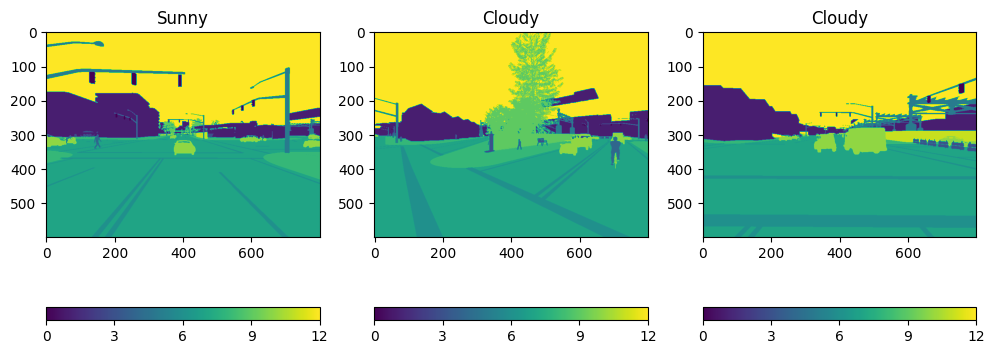

In [11]:
gt_1 = (mpimg.imread(img_path_1.replace('Images', 'Labels_int'))*255).astype(int)
gt_2 = (mpimg.imread(img_path_2.replace('Images', 'Labels_int'))*255).astype(int)
gt_3 = (mpimg.imread(img_path_3.replace('Images', 'Labels_int'))*255).astype(int)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(gt_1)
plt.colorbar(ticks=[0, 3, 6, 9, 12], orientation='horizontal')
ax.set_title('Sunny')
ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(gt_2)
plt.colorbar(ticks=[0, 3, 6, 9, 12], orientation='horizontal')
ax.set_title('Cloudy')
ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(gt_3)
plt.colorbar(ticks=[0, 3, 6, 9, 12], orientation='horizontal')
ax.set_title('Cloudy')
plt.show()

### Plot the Occurrence of the pixels of each class

In [12]:
fnames_array = np.array(fnames)

np.random.seed(5)
np.random.shuffle(fnames_array)

train_fnames, valid_fnames, test_fnames = np.split(fnames_array, [int(0.6*len(fnames_array)), int(0.8*len(fnames_array))])

train_val_fnames = np.concatenate((train_fnames, valid_fnames))

In [13]:
get_msk = lambda o: str(o.absolute()).replace('Images', 'Labels_int')

In [14]:
class_counts = np.zeros(13).astype(int)
    
for name in train_fnames:
    msk_tensor = tensor(PILMask.create(get_msk(name)))
    unique_values, counts = np.unique(msk_tensor, return_counts=True)
    for i in range(len(counts)):
        class_counts[unique_values[i]] += counts[i]

In [15]:
color1, color2, color3 = (20/255,74/255,137/255, 0.8), (31/255, 183/255, 121/255,0.8),(253/255, 231/255, 37/255, 0.8)
color1_scaled, color2_scaled, color3_scaled = (20,74,137), (31, 183, 121),(253, 231, 37)
sns.set_palette([color1, color2, color3])

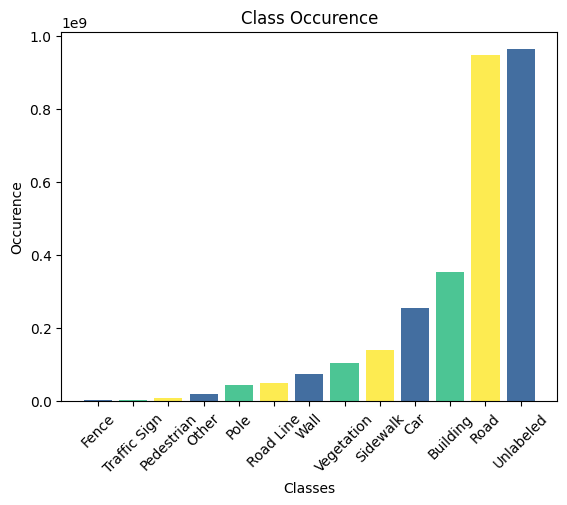

In [16]:
ind = np.argsort(class_counts)
class_counts_sorted = class_counts[ind]
VOC_CLASSES_sorted = VOC_CLASSES[ind]

plt.title("Class Occurence")
plt.bar(VOC_CLASSES_sorted,class_counts_sorted, label = 'Class Occurence', color=[color1, color2, color3])
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.ylabel('Occurence')

plt.show()

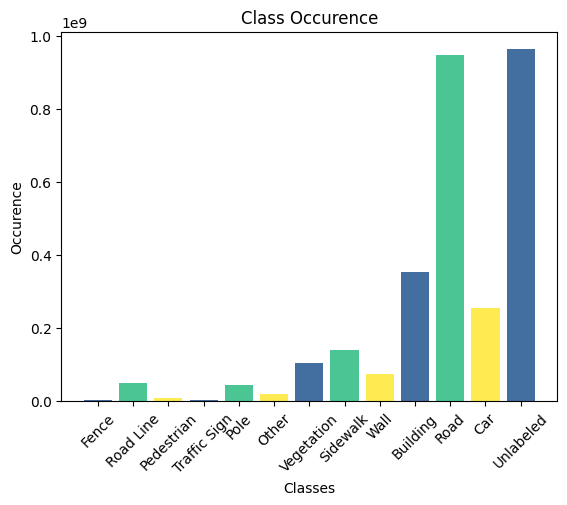

In [17]:
ind = [2,6,4, 0, 5, 3, 9, 8, 11, 1, 7, 10, 12]
class_counts_sorted = class_counts[ind]
VOC_CLASSES_sorted = VOC_CLASSES[ind]

plt.title("Class Occurence")
plt.bar(VOC_CLASSES_sorted,class_counts_sorted, label = 'Class Occurence', color=[color1, color2, color3])
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.ylabel('Occurence')
plt.savefig(os.path.join(repo_path, 'presentation', 'data_visualization', 'class_occurence'), bbox_inches = "tight")
plt.show()